
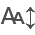

In [64]:
# Libs
import pandas as pd # To work with dataframes
import numpy as np # To work with arrays
from sklearn.preprocessing import StandardScaler # To apply standardization
from sklearn.model_selection import train_test_split # To split data into train and test
from sklearn.linear_model import LogisticRegression  # To train logisti regression model
from sklearn.ensemble import RandomForestClassifier # Tools to train randomforests

import joblib # Used to compact objects into pickle
import category_encoders as ce # Used to apply the WOE encoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve

import seaborn as sns # Used to make the confusion matrix prettier
import matplotlib.pyplot as plt # Used to make the confusion matrix prettier    

from itables import init_notebook_mode # To turn tables more attractive on jupyter notebook
init_notebook_mode(all_interactive=True)

In [2]:
df = pd.read_csv('../data/diabetes_BRFSS2015.csv')
display(df.head())

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

# Cleaning the dataset

### Turning the target column into boolean
It depends a lot of what real problem we are trying to solve.
For this example let's imagine that the model is applyied only to help doctors to predict if the customers of next day have high chances of need medical aid.

***What it means***: Even if the customer is pre-diabetic he will need aid.

In [3]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [4]:
df['Diabetes_012'] = np.where(df['Diabetes_012'] == 2, 1, df['Diabetes_012'])
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64

## Transforming BMI into categories
Shows the body mass index, an medical index that has great correlation with some diseases like diabetes.
It's a continuous feature, so to help we to apply the exploratory metrics we will transform it into range of values, making it become an categorical feature.

Rage of values
- Below 18.5 = Underweight
- 18.5 - 24.9 = Normal weight
- 25.0 - 29.9 = Overweight
- 30.0 - 34.9 = Obesity class I
- 35.0 - 39.9 = Obesity class II
- Above 40 = Obesity class III

In [5]:
df['BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.4
                                       , 24.9
                                       , 29.9
                                       , 34.9
                                       , 39.9,100], 
                   labels=['Underweight'
                          , 'Normal'
                          , 'Overweight'
                          , 'Obesity1'
                          , 'Obesity2'
                          , 'Obesity3']) 

df['BMI'].value_counts()

BMI
Overweight     93749
Normal         68953
Obesity1       53451
Obesity2       20663
Obesity3       13737
Underweight     3127
Name: count, dtype: int64

# Splitting the dataset into train and test

### Why is it important?
It's important to split into train and test because this way we can make some tests in the model created making a simulation of what will be the behavior of the model when it sees new data.

### Why we do it now?
Because we will use some preprocessing methods like standar

### Splitting X (the features) from y (the target column)

In [6]:
X = df.drop('Diabetes_012', axis='columns') 
display(X.head(5))

HighBP  HighChol  CholCheck         BMI  Smoker  Stroke  \
0     1.0       1.0        1.0    Obesity3     1.0     0.0   
1     0.0       0.0        0.0  Overweight     1.0     0.0   
2     1.0       1.0        1.0  Overweight     0.0     0.0   
3     1.0       0.0        1.0  Overweight     0.0     0.0   
4     1.0       1.0        1.0      Normal     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  AnyHealthcare  \
0                   0.0           0.0     0.0      1.0  ...            1.0   
1                   0.0           1.0     0.0      0.0  ...            0.0   
2                   0.0           0.0     1.0      0.0  ...            1.0   
3                   0.0           1.0     1.0      1.0  ...            1.0   
4                   0.0           1.0     1.0      1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 21 columns]

In [7]:
y = df['Diabetes_012']
display(y.head(5))

Diabetes_012
Loading ITables v2.1.4 from the init_notebook_mode cell... (need help?)


### Splitting into train and test
For this example we will use the proportion of 70|30 (70% to train and 30% to test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("X_train size: "    + str(len(X_train))  + 
      "\n y_train size: " + str(len(y_train)) +
      "\n X_test size: "  + str(len(X_test)) +
      "\n y_test size: " + str(len(y_test)) 
      )

X_train size: 177576
 y_train size: 177576
 X_test size: 76104
 y_test size: 76104


# Standardization of the columns

## What we will do in this scenario?
All features in this problemn were created as "Qualitative features", what means every feature can be seen as a category.
Because of that we will transform every feature in WOE values, the advantage of it is that we can group few categories that has the same "effect" on the independet variable (the y we are looking to predict).

In [9]:
columns = [col for col in X_train.columns]
woe_encoder = ce.WOEEncoder(cols=columns) # Create encoder
woe_encoded_train = woe_encoder.fit_transform(X_train[columns], y_train).add_suffix('_woe') #Apply de encoder
X_train = X_train.join(woe_encoded_train) # Add columns to the Df
X_train = X_train.drop(columns, axis='columns') 
display(X_train.head(5))


/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_enc

HighBP_woe  HighChol_woe  CholCheck_woe   BMI_woe  Smoker_woe  \
51457     0.687994      0.553631       0.036583  0.860395   -0.165400   
104586    0.687994      0.553631       0.036583  0.860395    0.184354   
135715   -0.873939     -0.600704       0.036583 -0.228051   -0.165400   
229271   -0.873939     -0.600704       0.036583 -0.942575   -0.165400   
107891   -0.873939     -0.600704       0.036583  0.390580    0.184354   

        Stroke_woe  HeartDiseaseorAttack_woe  PhysActivity_woe  Fruits_woe  \
51457    -0.061555                 -0.167986         -0.204222   -0.089296   
104586   -0.061555                 -0.167986         -0.204222   -0.089296   
135715   -0.061555                 -0.167986         -0.204222   -0.089296   
229271   -0.061555                 -0.167986         -0.204222   -0.089296   
107891   -0.061555                 -0.167986         -0.204222    0.143173   

        Veggies_woe  ...  AnyHealthcare_woe  NoDocbcCost_woe  GenHlth_woe  \
51457     -0.083384  ...           0.007402        -0.034332     1.315766   
104586    -0.083384  ...           0.007402        -0.034332     0.287569   
135715    -0.083384  ...           0.007402        -0.034332    -0.694131   
229271    -0.083384  ...           0.007402        -0.034332     0.287569   
107891    -0.083384  ...           0.007402        -0.034332    -0.694131   

        MentHlth_woe  PhysHlth_woe  DiffWalk_woe   Sex_woe   Age_woe  \
51457      -0.059309      0.371446      1.014126 -0.077125  0.513307   
104586     -0.059309     -0.002753     -0.310177  0.092641  0.535901   
135715     -0.059309     -0.318829     -0.310177 -0.077125 -0.823773   
229271     -0.059309     -0.318829     -0.310177  0.092641 -1.932201   
107891     -0.059309      0.241164     -0.310177  0.092641 -0.185440   

        Education_woe  Income_woe  
51457        0.711082    0.721161  
104586       0.065012    0.583539  
135715      -0.411325   -0.622843  
229271      -0.411325   -0.622843  
107891       0.281426   -0.142174  

[5 rows x 21 columns]

In [10]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [11]:
joblib.dump(sc, '../objects/std_scaler.bin', compress=True)

['../objects/std_scaler.bin']

In [12]:
print(X_train_std)

[[ 1.15483331  1.16695813  0.1971837  ...  0.90881151  2.12471582
   1.67327532]
 [ 1.15483331  1.16695813  0.1971837  ...  0.93937873  0.30441415
   1.38485591]
 [-0.86592584 -0.85692878  0.1971837  ... -0.90006232 -1.03766409
  -1.14339254]
 ...
 [-0.86592584  1.16695813  0.1971837  ...  0.55094827 -1.03766409
  -1.14339254]
 [-0.86592584 -0.85692878 -5.07141298 ... -0.90006232 -1.03766409
   0.2648554 ]
 [ 1.15483331 -0.85692878  0.1971837  ...  0.93937873  0.30441415
   0.2648554 ]]


# Model benchmark (all features - logistic regression)

In [13]:
regressor = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.6)
regressor.fit(X_train_std, y_train)

LogisticRegression(C=0.6, max_iter=1000)

In [14]:
joblib.dump(regressor, '../objects/logistic_regressor_benchmark.bin', compress=True)

['../objects/logistic_regressor_benchmark.bin']

# Random Forest
This model will not only become a "model" to be tested but will also help us to see which features are the best for the model.

In [15]:
# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)

RandomForestClassifier()

This is the first version of the random forest model.
It is using all features because we will use it as our "Feature Selection" algorithm.

In [16]:
# Extract feature importances
importances = rfc.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)

Feature  Importance
18                   Age    0.136524
20                Income    0.112974
15              PhysHlth    0.097160
14              MentHlth    0.080271
19             Education    0.078515
13               GenHlth    0.078359
3                    BMI    0.077402
0                 HighBP    0.048107
4                 Smoker    0.036706
8                 Fruits    0.036460
17                   Sex    0.031665
7           PhysActivity    0.029491
9                Veggies    0.029251
1               HighChol    0.027887
16              DiffWalk    0.026126
6   HeartDiseaseorAttack    0.019606
12           NoDocbcCost    0.016682
5                 Stroke    0.013701
11         AnyHealthcare    0.009829
10     HvyAlcoholConsump    0.008908
2              CholCheck    0.004374

In [17]:
# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:10].values

In [18]:
# Adding "_woe" to the name of the selected columns
for feature in range(0, len(top_features)):
    top_features[feature] = top_features[feature] + '_woe'

print(top_features)    

['Age_woe' 'Income_woe' 'PhysHlth_woe' 'MentHlth_woe' 'Education_woe'
 'GenHlth_woe' 'BMI_woe' 'HighBP_woe' 'Smoker_woe' 'Fruits_woe']


In [19]:
# Selecting only the desired features
X_train_selected = X_train[top_features]

# Applying the standardization
X_train_std = sc.fit_transform(X_train_selected)

In [20]:
rfc.fit(X_train_std, y_train)
joblib.dump(rfc, '../objects/random_forest_regressor.bin', compress=True)

['../objects/random_forest_regressor.bin']

# Logistic Regression
This will be also a Logistic Regression model but this time we will only use the features selected by the random forest model.

In [54]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.6, class_weight='balanced')
lr.fit(X_train_std, y_train)
joblib.dump(lr, '../objects/logistic_regressor.bin', compress=True)

['../objects/logistic_regressor.bin']

# XGBoost

In [22]:
# xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
# xgb_model.fit(X_train_std, y_train)
# joblib.dump(xgb_model, '../objects/xgb_regressor.bin', compress=True)


# Test

In [23]:

## Encoding into woe
woe_encoded_test = woe_encoder.fit_transform(X_test[columns], y_test).add_suffix('_woe') #Apply de encoder
X_test = X_test.join(woe_encoded_test) # Add columns to the Df
X_test = X_test.drop(columns, axis='columns') 

display(X_test.head())

# Preparing test data
X_test_selected = X_test[top_features]


/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/category_enc

HighBP_woe  HighChol_woe  CholCheck_woe   BMI_woe  Smoker_woe  \
219620   -0.883662     -0.649833       0.035283 -0.994328   -0.156051   
132821    0.687451      0.577713       0.035283 -0.206950   -0.156051   
151862   -0.883662     -0.649833       0.035283 -0.994328   -0.156051   
139717   -0.883662     -0.649833       0.035283 -0.206950    0.175258   
239235   -0.883662      0.577713       0.035283  0.397937    0.175258   

        Stroke_woe  HeartDiseaseorAttack_woe  PhysActivity_woe  Fruits_woe  \
219620   -0.057773                 -0.160897          0.490088   -0.093365   
132821   -0.057773                 -0.160897         -0.199415   -0.093365   
151862   -0.057773                 -0.160897         -0.199415   -0.093365   
139717   -0.057773                 -0.160897         -0.199415    0.148790   
239235   -0.057773                 -0.160897          0.490088   -0.093365   

        Veggies_woe  ...  AnyHealthcare_woe  NoDocbcCost_woe  GenHlth_woe  \
219620    -0.074031  ...            0.01175        -0.026620     0.310991   
132821    -0.074031  ...            0.01175        -0.026620     0.310991   
151862    -0.074031  ...            0.01175        -0.026620    -1.713888   
139717    -0.074031  ...            0.01175        -0.026620    -0.702248   
239235    -0.074031  ...            0.01175         0.262973     1.015420   

        MentHlth_woe  PhysHlth_woe  DiffWalk_woe   Sex_woe   Age_woe  \
219620     -0.074962      0.315636     -0.292821 -0.066467 -0.220924   
132821     -0.055010     -0.308900     -0.292821 -0.066467  0.329607   
151862     -0.055010     -0.308900     -0.292821  0.080054 -2.315810   
139717     -0.074962     -0.308900     -0.292821  0.080054 -2.012108   
239235      0.430239     -0.437262      0.973851 -0.066467 -0.044846   

        Education_woe  Income_woe  
219620       0.265207    0.785952  
132821      -0.400878    0.082741  
151862       0.265207   -0.163902  
139717       0.265207   -0.163902  
239235       0.704733    0.785952  

[5 rows x 21 columns]

In [24]:
X_test_std = sc.fit_transform(X_test)
print(X_test_std)

[[-0.86879331 -0.86110992  0.19630873 ... -0.06897311  0.88980044
   1.78115727]
 [ 1.15102175  1.16129193  0.19630873 ...  0.65408306 -1.05028243
   0.33506616]
 [-0.86879331 -0.86110992  0.19630873 ... -2.82035393  0.88980044
  -0.17213442]
 ...
 [-0.86879331 -0.86110992  0.19630873 ... -0.89964864 -1.05028243
  -0.17213442]
 [-0.86879331 -0.86110992  0.19630873 ...  0.95974747 -1.05028243
  -0.17213442]
 [ 1.15102175 -0.86110992  0.19630873 ...  0.65408306  0.36026608
   1.11761919]]


In [55]:
# Making the predictions
y_pred_regressor = regressor.predict(X_test_std)
y_pred_lr  = lr.predict(X_test_selected)
y_pred_rfc = rfc.predict(X_test_selected)
#y_pred_xgb = xgb_model.predict(X_test_selected)

/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/isabarrenha/Projects/diabetes-prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Evaluation of the models
## Metrics selected (champion of that metric)
- MSE: To know how close the predictions are (Reference)
- Recall: A false negative is very important in this business problem, because someone that need special care for diabetes but the model said is healthy could have problems without proper threatment (Logistic Regression)
- ROC and AUC: Performance of the model across thresholds (Logistic Regression)

## Selected model: Logistic Regression
- Easy to explain
- Relative good performance in all metrics
- The best model in the most important metrics for this problem (Recall, ROC and AUC)

## Mean Squared Error (MSE)
The MSE helps us measure how well our models make predictions and how close those predictions are to reality.

How to interpret:
- The smaller the MSE means the closer your models prediction to the reality

In [56]:
print("MEAN SQUARED ERROR")
print("Reference: "           + str(mean_squared_error(y_test, y_pred_regressor)))
print("Logistic Regression: " + str(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest: "       + str(mean_squared_error(y_test, y_pred_rfc)))
#print("XGBoost: "             + str(mean_squared_error(y_test, y_pred_xgb)))


MEAN SQUARED ERROR
Reference: 0.1492300010511931
Logistic Regression: 0.19673078944602124
Random Forest: 0.16289551140544517


## Confusion Matrix
Confusion Matrix will is a table that will show us in a structured visual way how was the behaviour of our predictions compared to what really happened.

It's an table that will help us to understand the next metrics.

How to interpet? The higher the best.

[Text(0, 0.5, 'health'), Text(0, 1.5, 'need_care')]

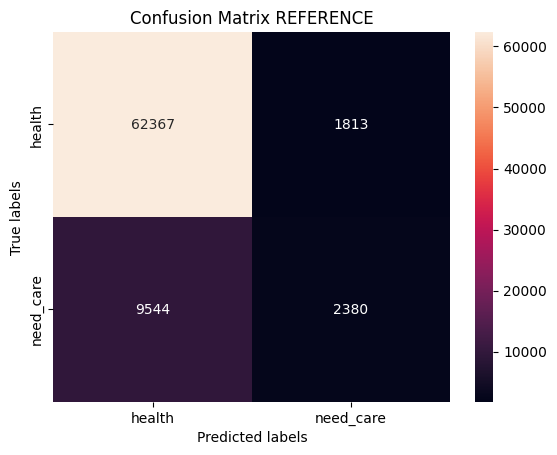

In [57]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_regressor)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix REFERENCE')
ax.xaxis.set_ticklabels(['health', 'need_care']); ax.yaxis.set_ticklabels(['health', 'need_care'])

[Text(0, 0.5, 'health'), Text(0, 1.5, 'need_care')]

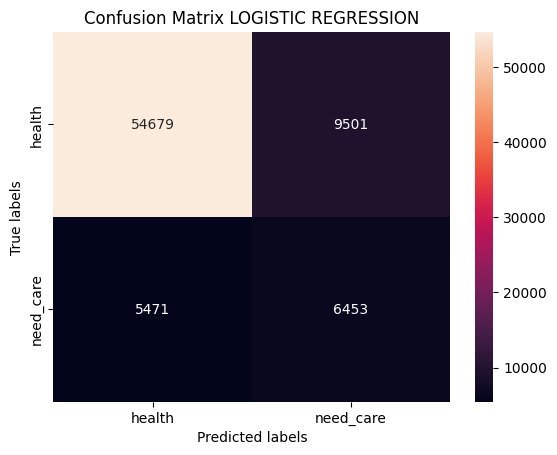

In [58]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix LOGISTIC REGRESSION')
ax.xaxis.set_ticklabels(['health', 'need_care']); ax.yaxis.set_ticklabels(['health', 'need_care'])

[Text(0, 0.5, 'health'), Text(0, 1.5, 'need_care')]

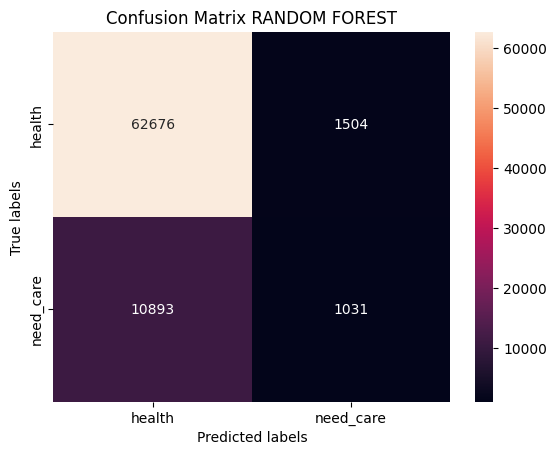

In [59]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix RANDOM FOREST')
ax.xaxis.set_ticklabels(['health', 'need_care']); ax.yaxis.set_ticklabels(['health', 'need_care'])

## Accuracy
Accuracy answers the question: how often the model is right? (True positive + True negative / All predictions).

It's an interesting metric when all the classes of the target have equal importance and when the classes are balanced.

How to interpet? The higher the best.

In [60]:
print("ACCURACY OF THE MODEL:", )

print("Reference: "           + str(accuracy_score(y_test, y_pred_regressor)))
print("Logistic Regression: " + str(accuracy_score(y_test, y_pred_lr)))
print("Random Forest: "       + str(accuracy_score(y_test, y_pred_rfc)))
#print("XGBoost: "             + str(accuracy_score(y_test, y_pred_xgb)))

ACCURACY OF THE MODEL:
Reference: 0.8507699989488069
Logistic Regression: 0.8032692105539788
Random Forest: 0.8371044885945548


## Precision
Precision answers the question: how often the true positive predictions are correct? (True positives / True positive + false positives)

It's an interesting metric when:
- You are working with imbalanced classes
- When the cost of a false positive is high

How to interpet? The higher the best.

In [61]:
print("PRECISION OF THE MODEL:", )

print("Reference: "           + str(precision_score(y_true=y_test, y_pred=y_pred_regressor, average='macro')))
print("Logistic Regression: " + str(precision_score(y_true=y_test, y_pred=y_pred_lr       , average='macro')))
print("Random Forest: "       + str(precision_score(y_true=y_test, y_pred=y_pred_rfc      , average='macro')))

PRECISION OF THE MODEL:
Reference: 0.7174465380353645
Logistic Regression: 0.656759711602278
Random Forest: 0.6293205163192208


## Recall
Accuracy answers the question: can an ML model find all instances of the positive class? (True positives / True positives and False negatives)

It's an interesting metric when:
- You are working with imbalanced classes
- When the cost of a false negative is high

How to interpet? The higher the best.

In [62]:
print("RECALL OF THE MODEL:", )

print("Reference: "           + str(recall_score(y_true=y_test, y_pred=y_pred_regressor, average='macro')))
print("Logistic Regression: " + str(recall_score(y_true=y_test, y_pred=y_pred_lr       , average='macro')))
print("Random Forest: "       + str(recall_score(y_true=y_test, y_pred=y_pred_rfc      , average='macro')))

RECALL OF THE MODEL:
Reference: 0.5856743874600422
Logistic Regression: 0.6965703428245931
Random Forest: 0.5315150910581601


## Roc curve + AUC (Area Under the Curve)
### Roc Curve
The Roc Curve is a visual representation of model performance across all thresholds. It is drawn by calculating the true positive rate (TPR) and false positive rate (FPR) at every possible threshold.

How to interpet? A perfect model, which at some threshold has a TPR of 1.0, and a FPR of 0.0.

### AUC (Area Under the Curve)
Represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative.

How to interpet? A perfect model, containing a square with sides of length 1, has an area under the curve (AUC) of 1.0. This means there is a 100% probability that the model will correctly rank a randomly chosen positive example higher than a randomly chosen negative example.

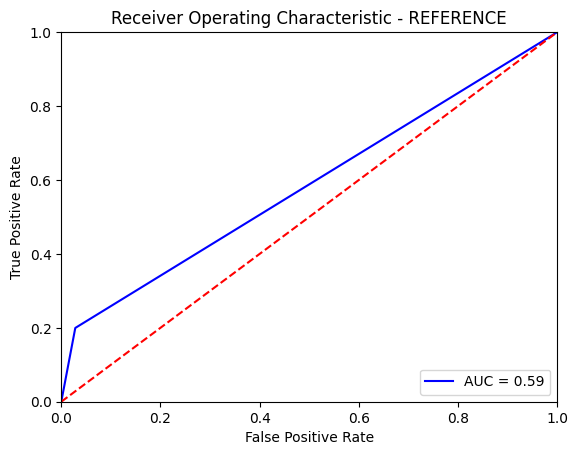

In [69]:
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_regressor)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic - REFERENCE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

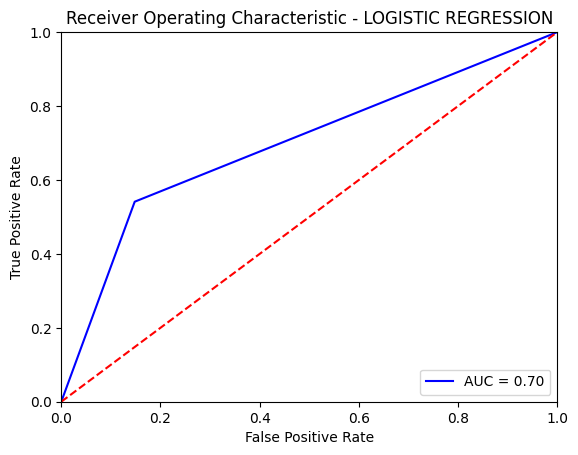

In [70]:
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_lr)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic - LOGISTIC REGRESSION')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

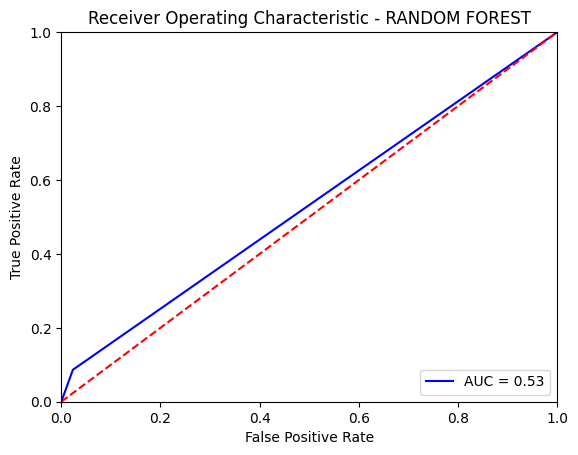

In [71]:
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_rfc)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic - RANDOM FOREST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()